In [30]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

%matplotlib inline

In [26]:
full_df = pd.read_csv('Breast Cancer Diagnosis/breast-cancer-wisconsin.data', 
                      names=['id','clumpthickness','cellsize','cellshape','adhesion','epithelialsize',
                             'barenuclei','chromatin','nucleoli','mitosis','class']
                     ) 
full_df['class'] = full_df['class'].replace({2:0, 4:1})
full_df['barenuclei'] = pd.to_numeric(full_df['barenuclei'], errors='coerce')
full_df = full_df.dropna()
full_df.shape

(683, 11)

In [27]:
X = full_df.loc[:, 'clumpthickness':'mitosis']
Y = full_df.loc[:, 'class']

First, let's create a decision tree, see how accurate we can make it, then measure its runtime.

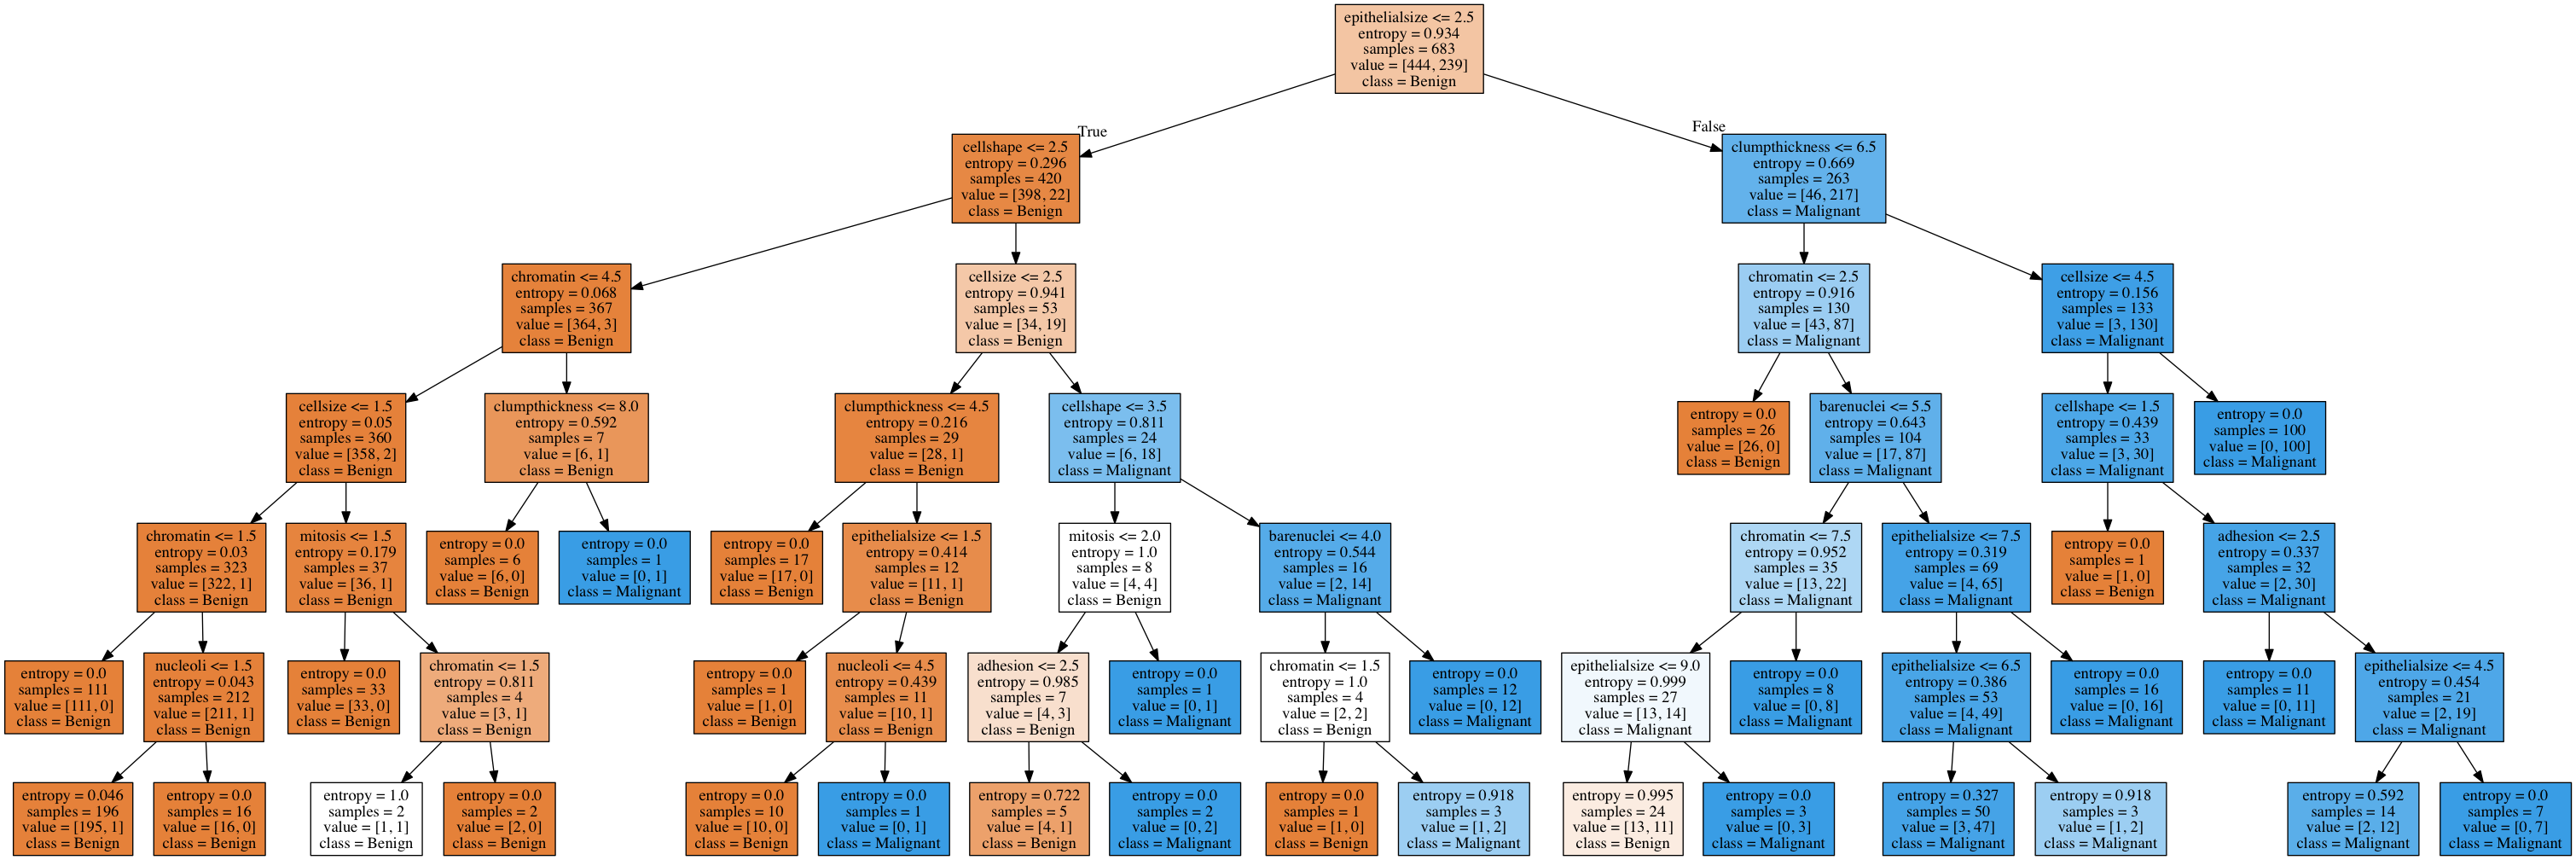

In [44]:
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=6
)
decision_tree.fit(X, Y)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Benign', 'Malignant'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [57]:
start_time = time.time()
dt_score = cross_val_score(decision_tree, X, Y, cv=5)
print(dt_score)
print('Accuracy: %.2f +/- %.2f' % (dt_score.mean(), dt_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.90510949  0.91970803  0.97080292  0.94890511  0.95555556]
Accuracy: 0.94 +/- 0.02
--- 0.022894859313964844 seconds ---


In [59]:
rfc = ensemble.RandomForestClassifier()
start_time = time.time()
rfc_score = cross_val_score(rfc, X, Y, cv=5)
print(rfc_score)
print('Accuracy: %.2f +/- %.2f' % (rfc_score.mean(), rfc_score.std()))
print("--- %s seconds ---" % (time.time() - start_time))

[ 0.91970803  0.94890511  0.97810219  0.97810219  0.97777778]
Accuracy: 0.96 +/- 0.02
--- 0.09314298629760742 seconds ---


Random Forest does a tiny bit better, and takes 4-6 times longer, depending on the run. And this is for a tiny data set! 10 columns and 680 data points. 